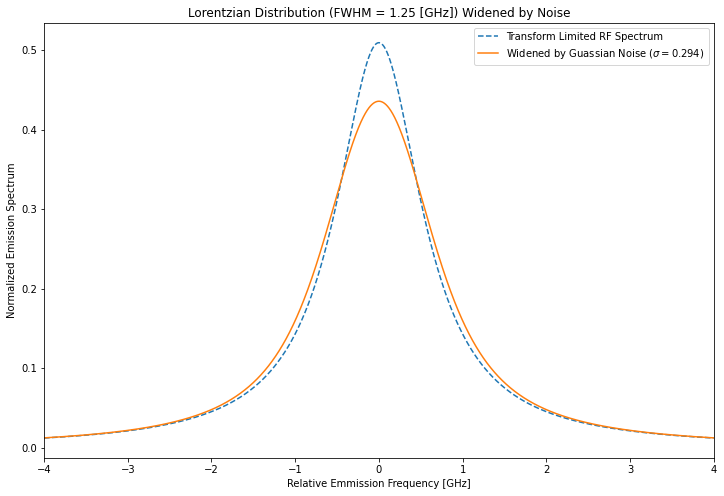

In [6]:
import numpy as np
from scipy.special import wofz
import matplotlib.pyplot as plt
import pylab

HWHM = 1.25/2.0

def G(x, sigma):
    return 1./(np.sqrt(2.*np.pi)*sigma)*np.exp(-np.power((x)/sigma, 2.)/2)

def L(x):
    return HWHM/np.pi/(x**2+HWHM**2)

def V(x, sigma):

    return np.real(wofz((x + 1j*HWHM)/sigma/np.sqrt(2)))/sigma/np.sqrt(2*np.pi)

def find_FWHM(sigma):
    f_vals = np.linspace(5,0,1000)
    V_vals = V(f_vals,sigma)
    V_max = V(0,sigma)
    for i in range(1000):
        if (V_vals[i] < V_max/2):
            HWHM = f_vals[i]
    return 2*HWHM
    

x = np.linspace(-4,4,10000)
pylab.plot(x, L(x), ls='--', label='Transform Limited RF Spectrum')
pylab.plot(x, V(x, 0.294), label='Widened by Guassian Noise ($\sigma = 0.294$)')
#pylab.plot(x, V(x, 0.4), label='Voigt with $\sigma = 0.4$')
#pylab.plot(x, V(x, 0.6), label='Voigt with $\sigma = 0.6$')
pylab.xlim(-4,4)
pylab.xlabel("Relative Emmission Frequency [GHz]")
pylab.ylabel("Normalized Emission Spectrum")
pylab.title("Lorentzian Distribution (FWHM = 1.25 [GHz]) Widened by Noise")
pylab.legend()
pylab.show()
plt.rcParams['figure.figsize'] = [12,8]

In [45]:
sigmas = np.linspace(0.001,0.5,10000)
FWHMs = np.zeros(10000)
for i in range(10000):
    FWHMs[i] = find_FWHM(sigmas[i])

Text(0.5, 1.0, 'Emission Spectrum FWHM vs Spectral Wandering Standard Deviation')

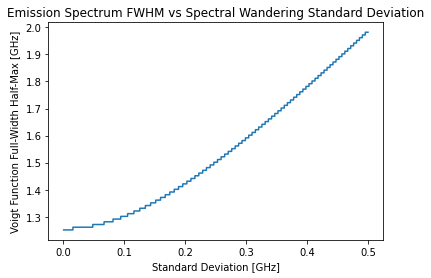

In [50]:
plt.plot(sigmas,FWHMs)
plt.xlabel("Standard Deviation [GHz]")
plt.ylabel("Voigt Function Full-Width Half-Max [GHz]")
plt.title("Emission Spectrum FWHM vs Spectral Wandering Standard Deviation")

In [56]:
percents = np.zeros(10000)
for i in range(10000):
    percents[i] = 100*(find_FWHM(sigmas[i])/1.25 - 1)

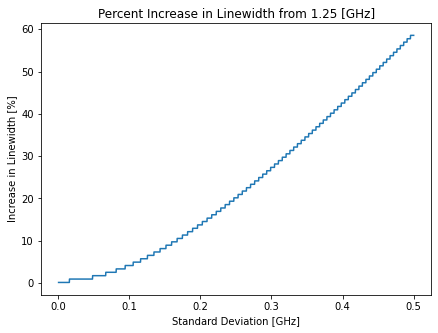

In [59]:
plt.plot(sigmas,percents)
plt.xlabel("Standard Deviation [GHz]")
plt.ylabel("Increase in Linewidth [%]")
plt.title("Percent Increase in Linewidth from 1.25 [GHz]")
plt.rcParams['figure.figsize'] = [7, 5]